### Task 4: Model Evaluation
Notebook: notebooks/Model_Evaluation.ipynb Steps:

-Evaluate the model using metrics such as Mean Squared Error (MSE), R-squared.
-Plot residuals to check the assumptions of linear regression.
-Compare model performance with different feature sets or preprocessing steps.
Script: scripts/evaluate_model.py

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


###Load the Data and Train the Model

In [2]:
###Load the Preprocessed Dataset
def read_file(filename):
    filepath = '../Data/'+str(filename)
    return pd.read_csv(filepath)

X_test = read_file('X_test.csv')
y_test = read_file('y_test.csv')
X_train = read_file('X_train.csv')
y_train = read_file('y_train.csv')

print(len(X_test), len(X_train), len(y_test), len(y_train))

print("X_test data: \n", X_test)
print("y_test data: \n", y_test)

51 201 51 201
X_test data: 
         crim        zn     indus       nox        rm       age       dis  \
0  -0.236041  0.871318 -0.501726 -1.073076  0.439527 -0.440185  1.951028   
1  -0.214499  0.237584 -0.144178  0.338419 -0.580839  0.940816  1.253798   
2   0.089608 -0.596277  2.349763  1.856155 -0.930475  1.402401 -1.527156   
3   2.283708  0.737901 -0.837928  2.205235  2.565886  1.263550 -1.295462   
4  -0.332314 -0.596277 -0.823697  0.125936 -1.608341  1.038387 -1.003274   
5  -0.558640  2.072078 -0.403890 -0.830238  0.556073 -1.078148 -0.131059   
6   1.016799 -0.596277  0.216927  0.641966  0.919980  0.813224 -0.595803   
7  -0.626012  2.072078 -1.321774 -1.103430  0.575101 -0.616563  2.496430   
8  -0.505262  0.237584 -0.144178  0.338419 -0.854364 -0.819210  0.609211   
9  -0.323316 -0.596277 -0.314947 -0.815061 -0.188390 -2.035092  0.761716   
10 -0.543046 -0.596277  0.738129 -0.982012 -0.890041 -0.909276  0.073580   
11 -0.610532 -0.596277 -0.967784 -0.632932 -0.904312 -1.314

In [3]:

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

###Evaluate the model

In [4]:
# Predict on test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared (R²)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")


Mean Squared Error (MSE): 5.04
R-squared (R²): 0.76


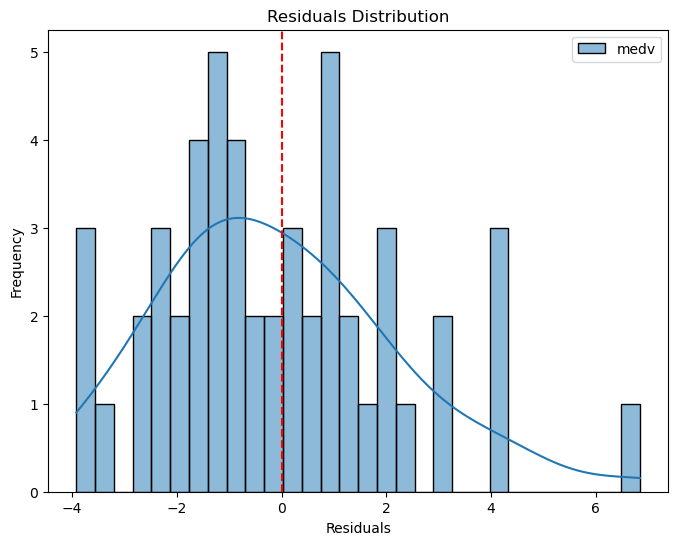

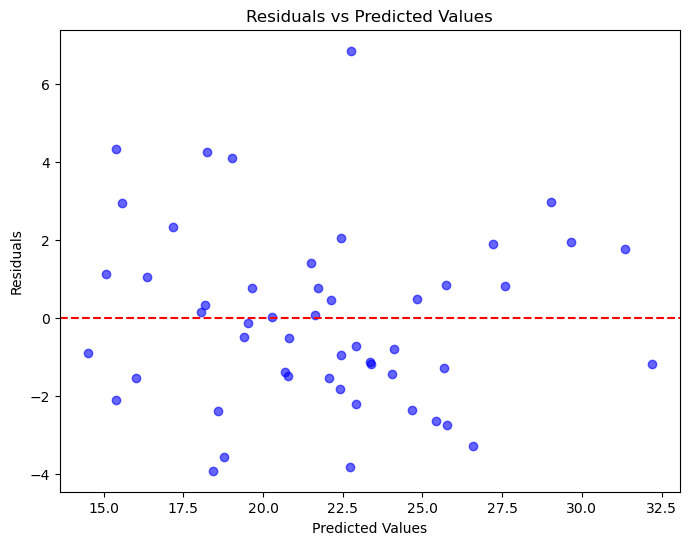

In [5]:
# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30, color="blue")
plt.axvline(0, color="red", linestyle="--")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residuals Distribution")
plt.show()

# Residuals vs Predictions plot
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, color="blue", alpha=0.6)
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.show()


 ###Compare Performance with Different Feature Sets

In [6]:
# Try with fewer features
selected_features = ['rm', 'lstat', 'ptratio']  # Select important features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Train new model
model_selected = LinearRegression()
model_selected.fit(X_train_selected, y_train)

# Predict and evaluate
y_pred_selected = model_selected.predict(X_test_selected)
mse_selected = mean_squared_error(y_test, y_pred_selected)
r2_selected = r2_score(y_test, y_pred_selected)

print(f"Selected Features - MSE: {mse_selected:.2f}, R²: {r2_selected:.2f}")


Selected Features - MSE: 6.84, R²: 0.68
